In [1]:
!pip install -r requirements.txt --quiet

In [2]:
import os
import shutil

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
from watermark import watermark

In [3]:
# !mkdir Results_24h

In [4]:
# shutil.unpack_archive("Results_24h.zip", "Results_24h/")

In [5]:
# @title
def visSets(set1: list, set2: list, csvpath: str) -> [DataFrame, DataFrame]:
    """
    Visualize sets of data from csv files in a given directory

    Parameters:
    set1 (list): List of strings indicating well names for set 1
    set2 (list): List of strings indicating well names for set 2
    csvpath (str): Path to directory containing csv files

    Returns:
    Tuple: A tuple of two pandas dataframes, containing data from well_set1 and well_set2 respectively

    """
    dir_list = os.listdir(csvpath)
    print("Files and directories in '", path, "' :")

    well_set1 = pd.DataFrame()
    well_set2 = pd.DataFrame()

    # read csv of set 1
    for well in set1:
        for csv in dir_list:
            if csv.find(well, 0, 3) > -1:
                csv_set = pd.read_csv(csvpath + csv, sep=",")
                csv_set["Well"] = well
                well_set1 = pd.concat([well_set1, csv_set])

    # read csv of set 2
    for well in set2:
        for csv in dir_list:
            if csv.find(well, 0, 3) > -1:
                csv_set = pd.read_csv(csvpath + csv, sep=",")
                csv_set["Well"] = well
                well_set2 = pd.concat([well_set2, csv_set])

    return well_set1, well_set2

In [6]:
# @title
def pltoSet1(B23: DataFrame):
    """
    This function creates a box plot using the Seaborn library. It takes a pandas DataFrame as input
    and visualizes the distribution of "Mean" values for different "Well" categories.
    The plot is created with a logarithmic x axis, horizontal boxes and grid lines for the x axis.
    The y axis is labeled with "Mean".

    Parameters:
    B23 (pd.DataFrame): A pandas DataFrame with columns "Well" and "Mean".

    Returns:
    None
    """
    sns.set_theme(style="ticks")

    # Initialize the figure
    f, ax = plt.subplots(figsize=(7, 6))

    # Plot
    sns.boxplot(
        x="Well",
        y="Mean",
        data=B23,
        width=0.6,
        palette="vlag",
        showfliers=False,
    )

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.set(ylabel="Mean")
    sns.despine(trim=True, left=True)

In [7]:
# @title
def norm_test(data: list, name: str):
    """
    Performs a normality test on a given data sample and returns a conclusion on whether the data is from a normal distribution.

    Inputs:
    data (list): A list of numerical values representing the data sample
    name (str): A string that represents the name of the data sample

    Outputs:
    None

    Side effects:
    Prints the p-value and the conclusion of the normality test on the data sample.

    Example:
    >>> norm_test([1, 2, 3, 4, 5], "Sample Data")
    p = 0.157298
    null hypothesis: Sample Data comes from a normal distribution
    The null hypothesis cannot be rejected
    """
    k2, p = normaltest(data)
    alpha = 1e-3
    print("p = {:g}".format(p))
    print("null hypothesis: {} comes from a normal distribution".format(name))
    if p < alpha:  # null hypothesis: Data from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")
    print("")

In [8]:
# @title
def visStats(set1: list, set2: list, path: str, stat_text: str, fig_name: str):
    """
    visStats(set1: list, set2: list, path: str, stat_text: str, fig_name: str):

    This function generates visualization of statistics between two sets of data and saves the figure to current path.

    set1: list
    A list of strings containing the name of each well in the first set.
    set2: list
    A list of strings containing the name of each well in the second set.
    path: str
    The path to the directory where the figure will be saved.
    stat_text: str
    The text to be added to the plot as a title or subtitle.
    fig_name: str
    The name of the figure file to be saved.

    Returns: None
    """

    well_set1, well_set2 = visSets(set1, set2, path)
    well_set1["Set"] = 1
    well_set1["Well"].describe()

    well_set2["Set"] = 2
    well_set2["Well"].describe()

    pltoSet1(well_set1)
    pltoSet1(well_set2)

    print("Statistics:")
    print("")

    csv_all = pd.concat([well_set1, well_set2])

    sns.set_theme(style="ticks")

    # Initialize the figure
    f, ax = plt.subplots(figsize=(7, 6))

    # Plot
    sns.boxplot(
        x="Well",
        y="Mean",
        data=csv_all,
        width=0.6,
        hue="Set",
        palette=["m", "g"],
    )

    # Tweak the visual presentation
    # ax.xaxis.grid(True)
    ax.set(ylabel="Mean")
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    # sns.despine(trim=True, left=True)

    for well in set1:
        norm_test(csv_all[csv_all["Well"] == well].Mean, well)

    for well in set2:
        norm_test(csv_all[csv_all["Well"] == well].Mean, well)

    # pvalues with scipy:
    stat_results = [
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[0]].Mean,
            csv_all[csv_all["Well"] == set2[0]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[0]].Mean,
            csv_all[csv_all["Well"] == set2[1]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[0]].Mean,
            csv_all[csv_all["Well"] == set2[2]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[1]].Mean,
            csv_all[csv_all["Well"] == set2[0]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[1]].Mean,
            csv_all[csv_all["Well"] == set2[1]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[1]].Mean,
            csv_all[csv_all["Well"] == set2[2]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[2]].Mean,
            csv_all[csv_all["Well"] == set2[0]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[2]].Mean,
            csv_all[csv_all["Well"] == set2[1]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[2]].Mean,
            csv_all[csv_all["Well"] == set2[2]].Mean,
            alternative="two-sided",
        ),
    ]

    pvalues = [result.pvalue for result in stat_results]
    print(pvalues)

    pairs = [
        (set1[0], set2[0]),
        (set1[0], set2[1]),
        (set1[0], set2[2]),
        (set1[1], set2[0]),
        (set1[1], set2[1]),
        (set1[1], set2[2]),
        (set1[2], set2[0]),
        (set1[2], set2[1]),
        (set1[2], set2[2]),
    ]

    formatted_pvalues = [f"p={p:.2e}" for p in pvalues]

    for p in pvalues:
        print(p)

    # prepare plots
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)
    states_palette = sns.color_palette("YlGnBu", n_colors=5)

    cmap = sns.color_palette("colorblind")
    plotting_parameters = {
        "data": csv_all,
        "x": "Well",
        "y": "Mean",
        "showfliers": False,
        "width": 0.6,
        #'hue':"Set",
        "palette": [cmap[0], cmap[1], cmap[4], cmap[0], cmap[1], cmap[4]],
    }

    # show results
    with sns.plotting_context("notebook", font_scale=1.4):
        # Create new plot
        fig, ax = plt.subplots(1, 1, figsize=(12, 6))

        # Plot with seaborn
        sns.boxplot(**plotting_parameters)

        # Add annotations
        annotator = Annotator(ax, pairs, **plotting_parameters)
        ## p values
        # annotator.set_custom_annotations(formatted_pvalues)
        # annotator.annotate()

        ## <> p values
        annotator.configure(text_format="simple")
        annotator.set_pvalues(pvalues).annotate()

        # Label and show
        plt.title(stat_text, y=1.06)

        plt.savefig("./" + fig_name + ".png", bbox_inches="tight")
        plt.show()

In [9]:
path = "Results_24h_final/"

dir_list = os.listdir(path)
print("Files and directories in '", path, "' :")
# prints all files
print(dir_list)

Files and directories in ' Results_24h_final/ ' :
['B2_AllResults_2023-2-20_Results.csv', 'B3_AllResults_2023-2-20_Results.csv', 'B4_AllResults_2023-2-20_Results.csv', 'B6_AllResults_2023-2-20_Results.csv', 'B7_AllResults_2023-2-20_Results.csv', 'B8_AllResults_2023-2-20_Results.csv', 'C2_AllResults_2023-2-20_Results.csv', 'C3_AllResults_2023-2-20_Results.csv', 'C4_AllResults_2023-2-20_Results.csv', 'C6_AllResults_2023-2-20_Results.csv', 'C7_AllResults_2023-2-20_Results.csv', 'C8_AllResults_2023-2-20_Results.csv', 'D2_AllResults_2023-2-20_Results.csv', 'D3_AllResults_2023-2-20_Results.csv', 'D4_AllResults_2023-2-20_Results.csv', 'D6_AllResults_2023-2-20_Results.csv', 'D7_AllResults_2023-2-20_Results.csv', 'D8_AllResults_2023-2-20_Results.csv']


In [10]:
# create an Empty DataFrame object
df = pd.DataFrame()

# append columns to an empty DataFrame
df["Set"] = []
df["Mean"] = []
df["Mean_25"] = []
df["Mean_75"] = []
df["Median"] = []
df["Median_25"] = []
df["Median_75"] = []
df["Area"] = []
df["Area_25"] = []
df["Area_75"] = []
df["MoA"] = []

print(df)

Empty DataFrame
Columns: [Set, Mean, Mean_25, Mean_75, Median, Median_25, Median_75, Area, Area_25, Area_75, MoA]
Index: []


0
Files and directories in ' Results_24h_final/ ' :
Control
stats
Files and directories in ' Results_24h_final/ ' :
Mean Brigthnes
Set1
1.5175330319658564
Set2
2.7853351628075256
Mean Area
Set1
0.0538916017768487
Set2
0.022004952966714904
--Mean/Area--
Set1
28.158989191851663
Set2
126.57764672438404
Fold: 4.495106193691487
Files and directories in ' Results_24h_final/ ' :


C:\Users\mspat\AppData\Local\Temp\ipykernel_26828\2758996518.py:100: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mspat\AppData\Local\Temp\ipykernel_26828\2758996518.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Statistics:

p = 0
null hypothesis: B4 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C4 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: D4 comes from a normal distribution
The null hypothesis can be rejected

p = 3.83985e-91
null hypothesis: B2 comes from a normal distribution
The null hypothesis can be rejected

p = 3.65029e-132
null hypothesis: C2 comes from a normal distribution
The null hypothesis can be rejected

p = 7.43303e-205
null hypothesis: D2 comes from a normal distribution
The null hypothesis can be rejected

[3.274811228713227e-05, 8.826891288114686e-06, 0.013499146565833932, 2.594999635228013e-07, 4.8776786587232774e-08, 0.0003006322299549634, 6.0793124768692265e-09, 7.176413438224875e-10, 1.0059298142048562e-05]
3.274811228713227e-05
8.826891288114686e-06
0.013499146565833932
2.594999635228013e-07
4.8776786587232774e-08
0.0003006322299549634
6.0793124768692265e-09
7.176413438224

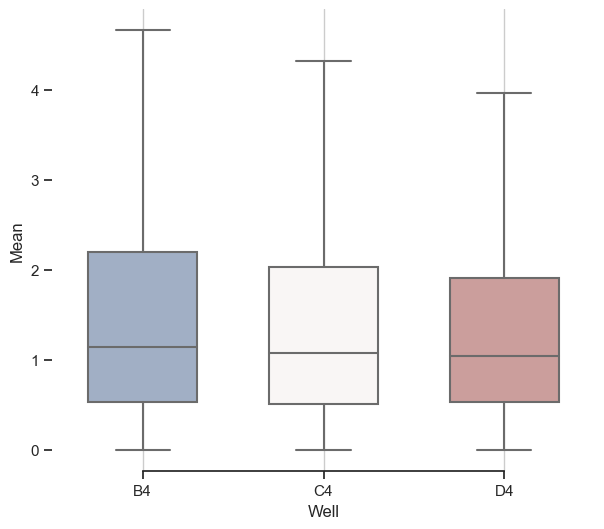

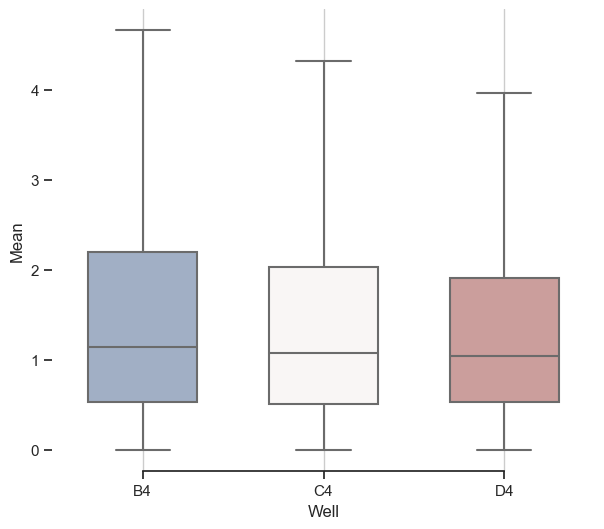

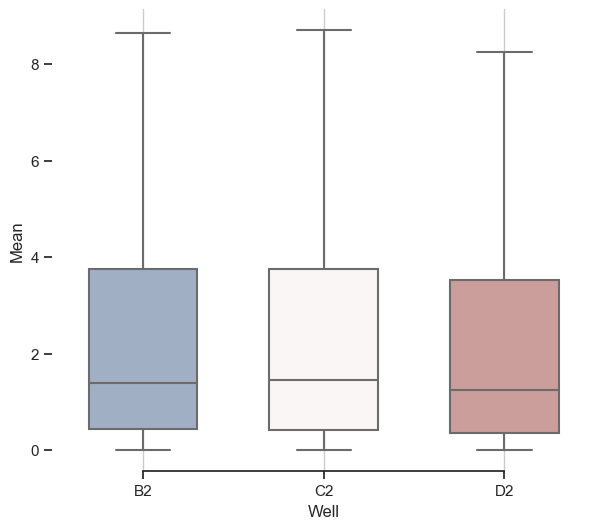

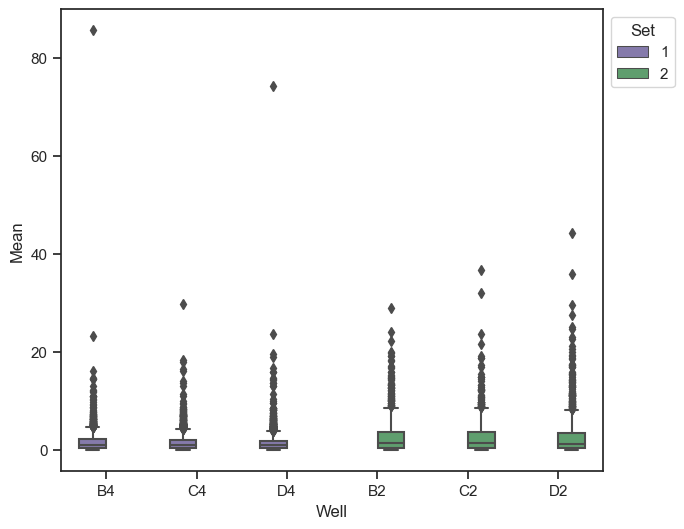

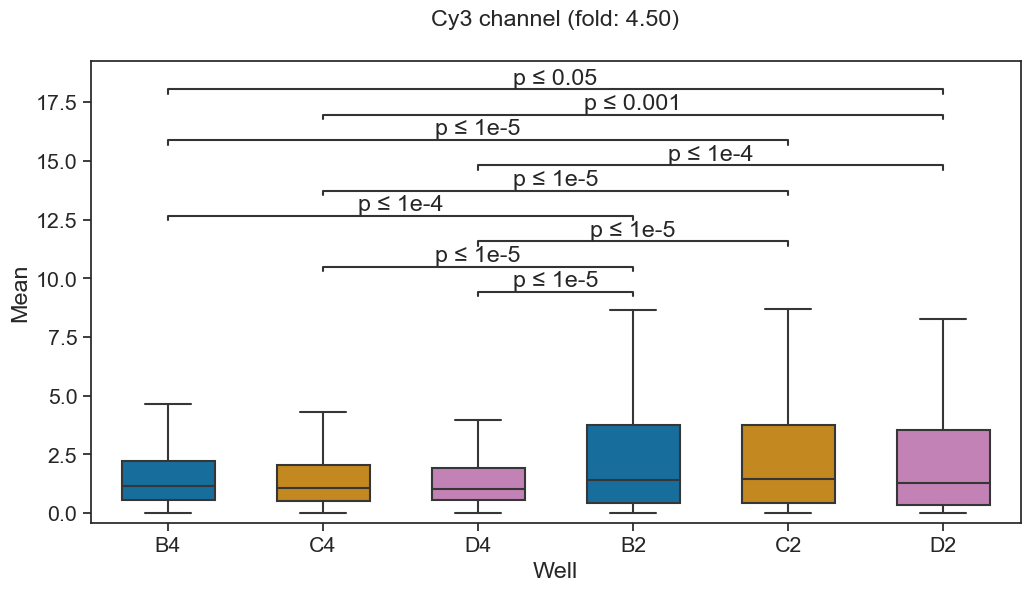

1
Files and directories in ' Results_24h_final/ ' :
Control
stats
Files and directories in ' Results_24h_final/ ' :
Mean Brigthnes
Set1
1.5175330319658564
Set2
2.604899894878706
Mean Area
Set1
0.0538916017768487
Set2
0.02891899730458221
--Mean/Area--
Set1
28.158989191851663
Set2
90.07573352019229
Fold: 3.1988269503032236
Files and directories in ' Results_24h_final/ ' :


C:\Users\mspat\AppData\Local\Temp\ipykernel_26828\2758996518.py:100: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mspat\AppData\Local\Temp\ipykernel_26828\2758996518.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Statistics:

p = 0
null hypothesis: B4 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C4 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: D4 comes from a normal distribution
The null hypothesis can be rejected

p = 3.89979e-107
null hypothesis: B3 comes from a normal distribution
The null hypothesis can be rejected

p = 2.97402e-177
null hypothesis: C3 comes from a normal distribution
The null hypothesis can be rejected

p = 2.20308e-155
null hypothesis: D3 comes from a normal distribution
The null hypothesis can be rejected

[0.00011155128852390872, 4.2099442233497015e-25, 4.4523657751815e-16, 0.0018961526318700592, 1.6617302670803824e-22, 3.794852353738629e-14, 0.004980483144063663, 1.452003181301268e-21, 2.679328263860598e-13]
0.00011155128852390872
4.2099442233497015e-25
4.4523657751815e-16
0.0018961526318700592
1.6617302670803824e-22
3.794852353738629e-14
0.004980483144063663
1.45200318130126

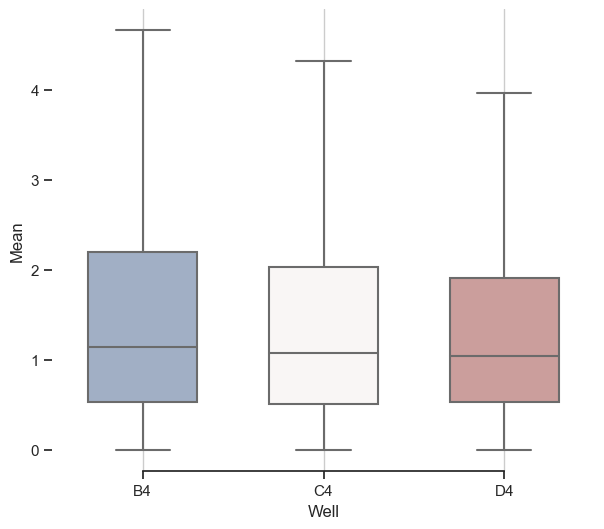

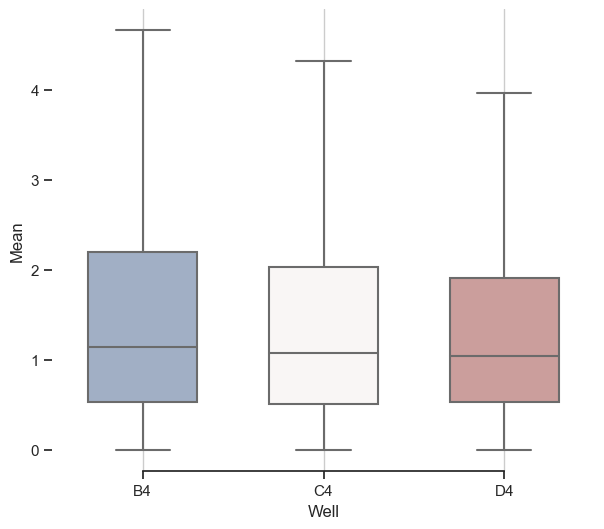

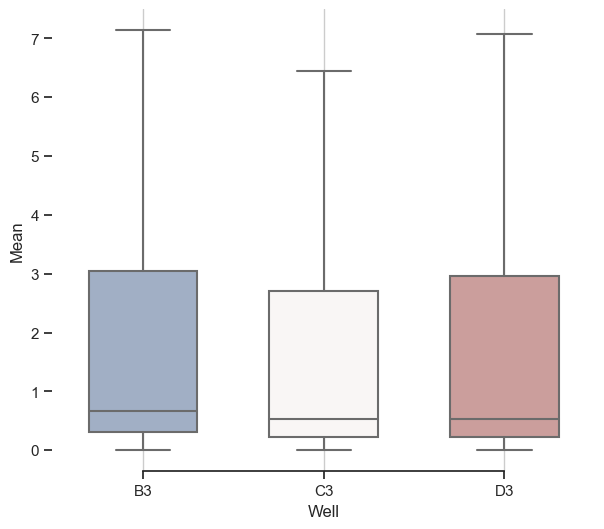

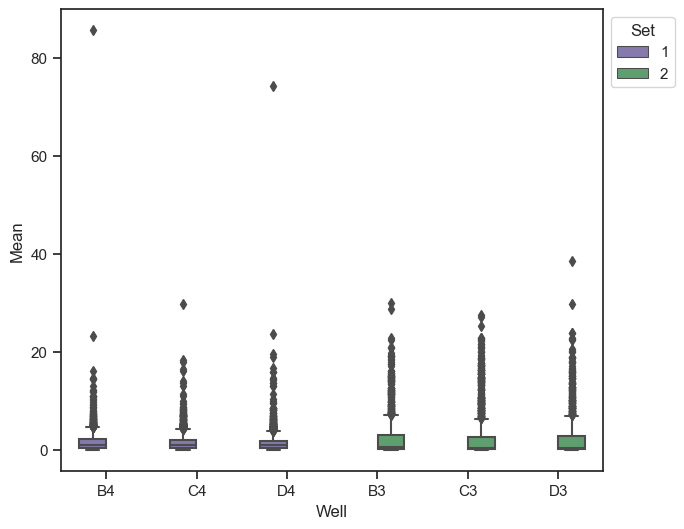

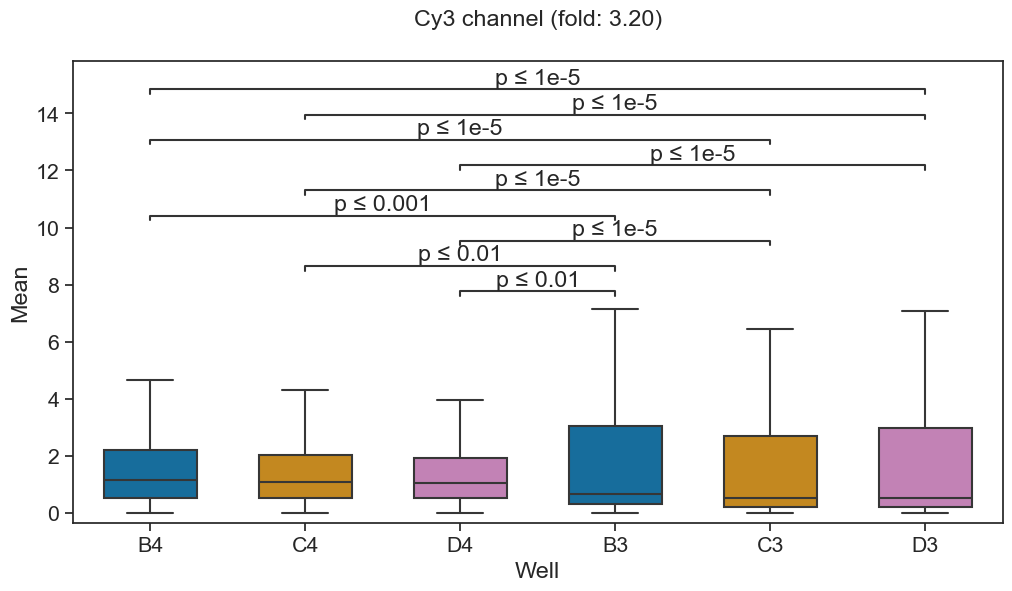

2
Files and directories in ' Results_24h_final/ ' :
Control
stats
Files and directories in ' Results_24h_final/ ' :
Mean Brigthnes
Set1
0.06356139264673795
Set2
0.5949237625231911
Mean Area
Set1
0.07196928049312677
Set2
0.05103205565862708
--Mean/Area--
Set1
0.8831739349236402
Set2
11.657844365566291
Fold: 13.19994160218761
Files and directories in ' Results_24h_final/ ' :


C:\Users\mspat\AppData\Local\Temp\ipykernel_26828\2758996518.py:100: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mspat\AppData\Local\Temp\ipykernel_26828\2758996518.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Statistics:

p = 0
null hypothesis: B8 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C8 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: D8 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: B6 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C6 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: D6 comes from a normal distribution
The null hypothesis can be rejected

[5.18395045880115e-101, 2.138714342333123e-77, 3.8624565708286706e-89, 3.683858751008832e-169, 2.533165656954071e-128, 2.3805887216052212e-148, 0.0, 0.0, 0.0]
5.18395045880115e-101
2.138714342333123e-77
3.8624565708286706e-89
3.683858751008832e-169
2.533165656954071e-128
2.3805887216052212e-148
0.0
0.0
0.0
D8 vs. B6: Custom statistical test, P_val:0.000e+00
C8 vs. B6: Custom statistical test, P_val:3.684e-16

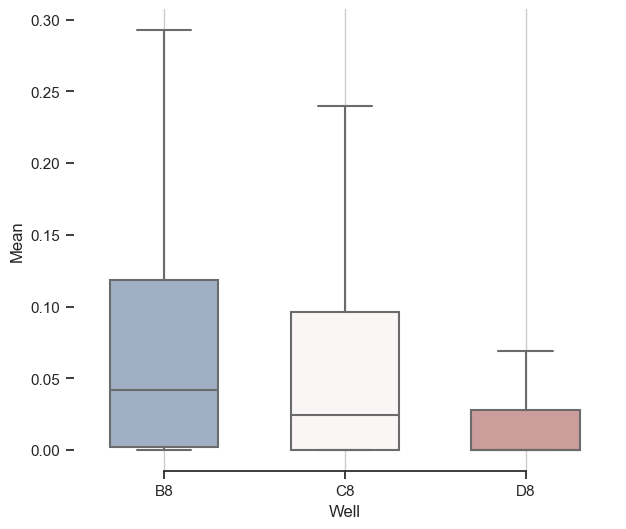

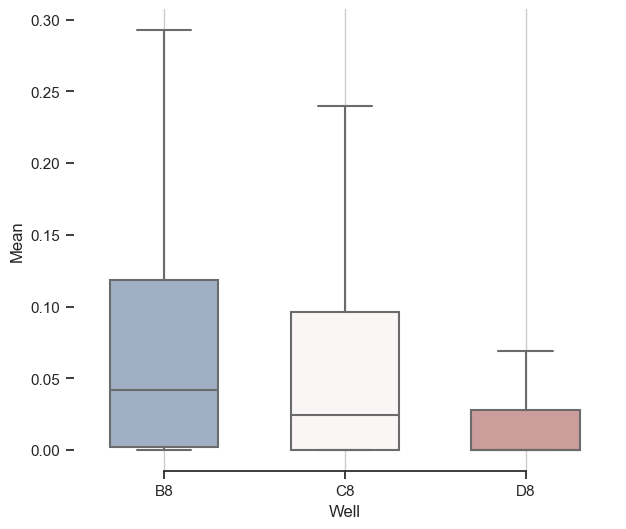

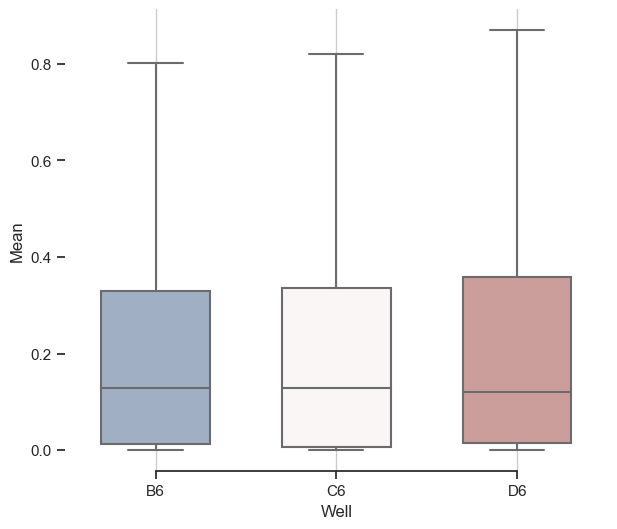

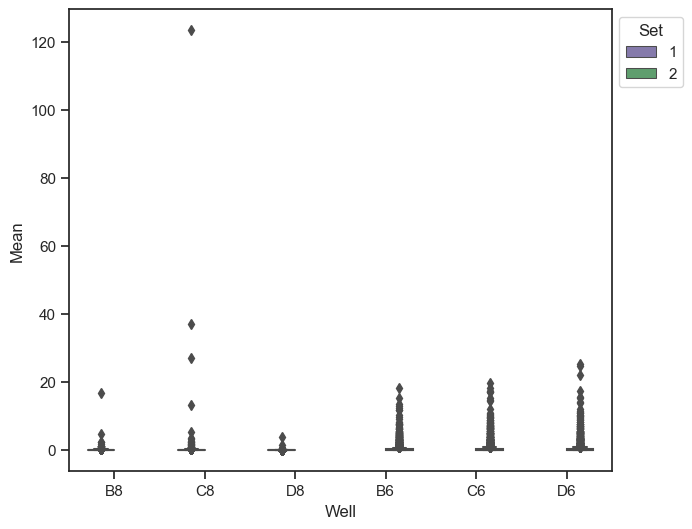

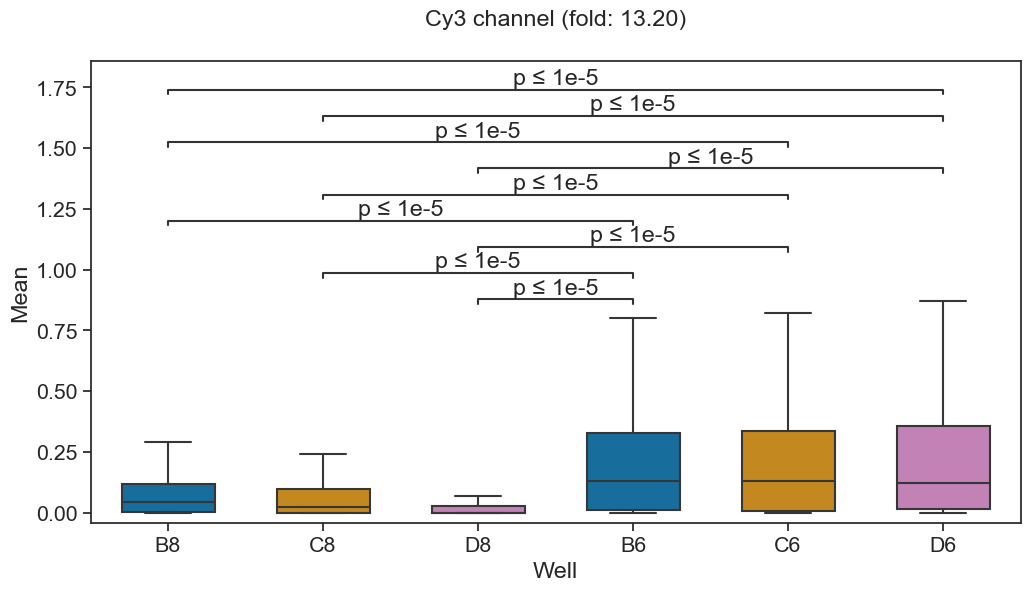

3
Files and directories in ' Results_24h_final/ ' :
Control
stats
Files and directories in ' Results_24h_final/ ' :
Mean Brigthnes
Set1
0.06356139264673795
Set2
0.35773621071486733
Mean Area
Set1
0.07196928049312677
Set2
0.05491403191662596


C:\Users\mspat\AppData\Local\Temp\ipykernel_26828\2758996518.py:100: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


--Mean/Area--
Set1
0.8831739349236402
Set2
6.5144772333964776
Fold: 7.376210931722893
Files and directories in ' Results_24h_final/ ' :


C:\Users\mspat\AppData\Local\Temp\ipykernel_26828\2758996518.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Statistics:

p = 0
null hypothesis: B8 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C8 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: D8 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: B7 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C7 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: D7 comes from a normal distribution
The null hypothesis can be rejected

[2.55580173438199e-112, 3.3139566650390882e-46, 7.53628953164001e-35, 8.713605547132496e-187, 6.5485888506519276e-93, 3.110600277611203e-77, 0.0, 0.0, 1.1136323792874272e-296]
2.55580173438199e-112
3.3139566650390882e-46
7.53628953164001e-35
8.713605547132496e-187
6.5485888506519276e-93
3.110600277611203e-77
0.0
0.0
1.1136323792874272e-296
D8 vs. B7: Custom statistical test, P_val:0.000e+00
C8 vs. B7: Custom

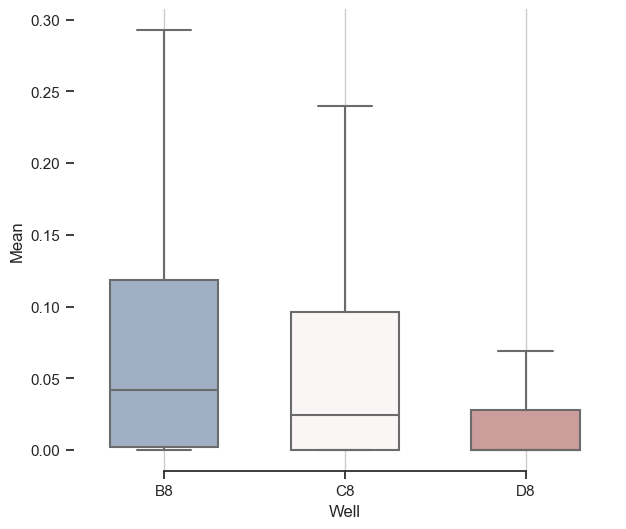

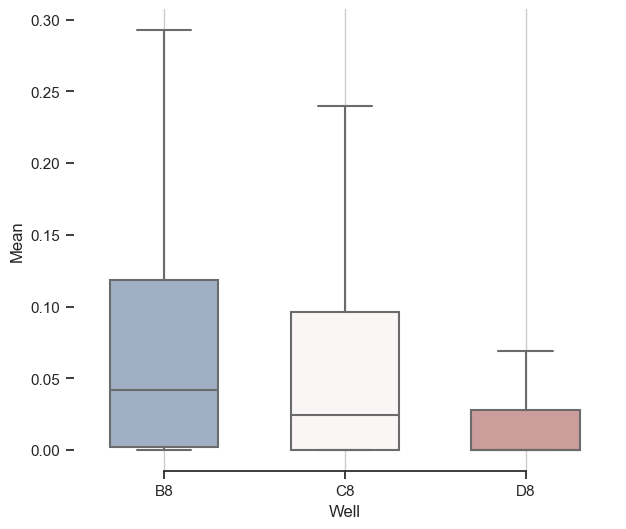

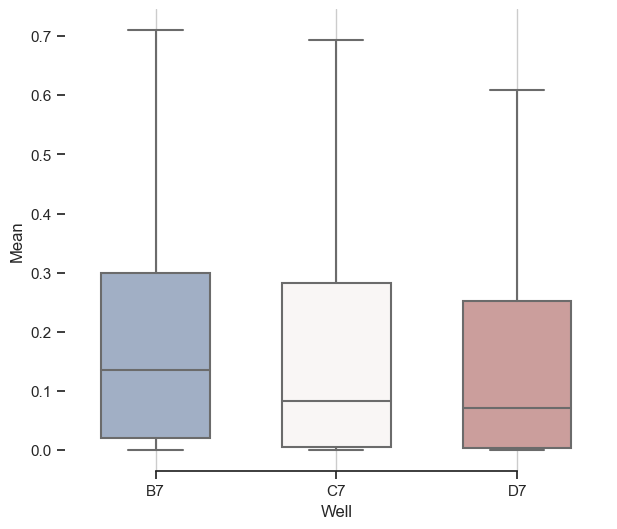

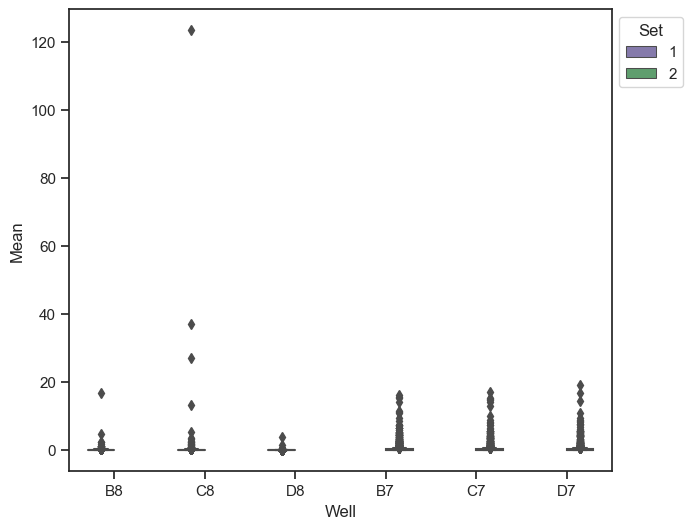

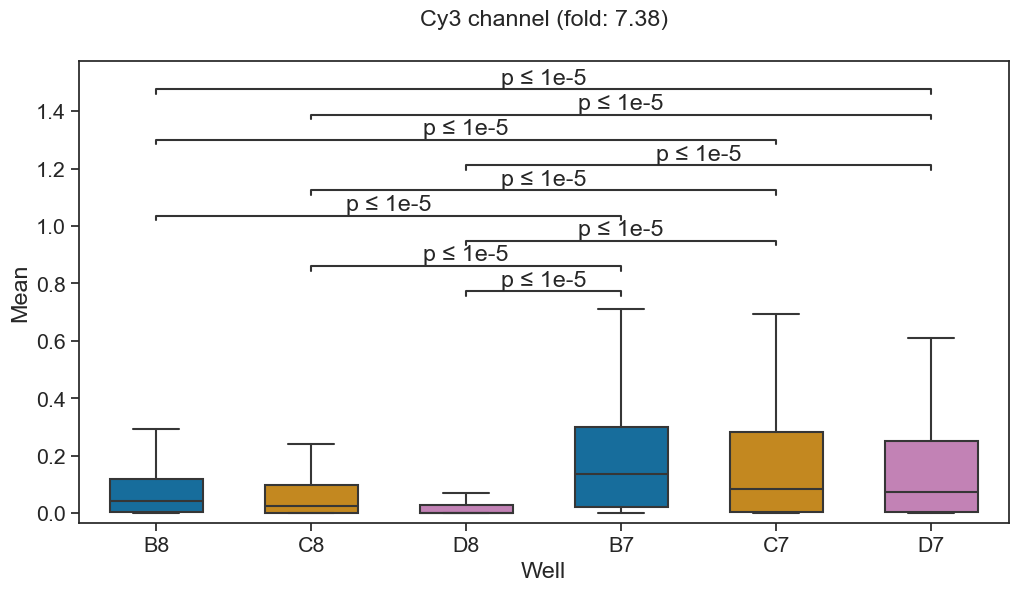

In [11]:
all_df = pd.DataFrame()
for s in range(4):
    well_set1 = pd.DataFrame()
    well_set2 = pd.DataFrame()
    print(s)
    if s == 0:
        set1 = ["B4", "C4", "D4"]  # kontrola
        set1_name = "CHOK1"
        set2 = ["B2", "C2", "D2"]
        set2_name = "CHOK1 Val30"
    if s == 1:
        set1 = ["B4", "C4", "D4"]  # kontrola
        set1_name = "CHOK1"
        set2 = ["B3", "C3", "D3"]
        set2_name = "CHOK1 Val15"
    if s == 2:
        set1 = ["B8", "C8", "D8"]  # kontrola
        set1_name = "HeLa"
        set2 = ["B6", "C6", "D6"]
        set2_name = "HeLa Val30"
    if s == 3:
        set1 = ["B8", "C8", "D8"]  # kontrola
        set1_name = "HeLa"
        set2 = ["B7", "C7", "D7"]
        set2_name = "HeLa Val15"

    well_set1, well_set2 = visSets(set1, set2, path)
    well_set1["Set"] = 1
    well_set1["Set_name"] = set1_name
    well_set1.Mean.describe()

    well_set2["Set"] = 2
    well_set2["Set_name"] = set2_name
    well_set2.Mean.describe()

    ## load all data to all_df
    if s == 0:
        all_df = pd.concat([well_set1, well_set2])
    if s == 1:
        all_df = pd.concat([all_df, well_set2])
    if s == 2:
        all_df = pd.concat([all_df, well_set1, well_set2])
    if s == 3:
        all_df = pd.concat([all_df, well_set2])

    print("Control")
    sns.set_theme(style="ticks")

    # Initialize the figure
    f, ax = plt.subplots(figsize=(7, 6))

    # Plot
    sns.boxplot(
        x="Well",
        y="Mean",
        data=well_set1,
        width=0.6,
        palette="vlag",
        showfliers=False,
    )

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.set(ylabel="Mean")
    sns.despine(trim=True, left=True)

    print("stats")
    well_set1, well_set2 = visSets(set1, set2, path)
    well_set1["Set"] = 1
    well_set1["Well"].describe()

    well_set2["Set"] = 2
    well_set2["Well"].describe()

    print("Mean Brigthnes")
    print("Set1")
    print(well_set1["Mean"].mean())
    print("Set2")
    print(well_set2["Mean"].mean())

    print("Mean Area")
    print("Set1")
    print(well_set1["Area"].mean())
    print("Set2")
    print(well_set2["Area"].mean())

    new_row = {
        "Set": set1_name,
        "Mean": well_set1["Mean"].mean(),
        "Mean_25": well_set1["Mean"].quantile(q=0.25),
        "Mean_75": well_set1["Mean"].quantile(q=0.75),
        "Median": well_set1["Mean"].median(),
        "Median_25": well_set1["Mean"].quantile(q=0.25),
        "Median_75": well_set1["Mean"].quantile(q=0.75),
        "Area": well_set1["Area"].mean(),
        "Area_25": well_set1["Area"].quantile(q=0.25),
        "Area_75": well_set1["Area"].quantile(q=0.75),
        "MoA": well_set1["Mean"].mean() / well_set1["Area"].mean(),
    }
    df = df.append(new_row, ignore_index=True)
    # new_row = {'Set':"".join(set2), 'Mean':well_set2["Mean"].mean(), 'Median':well_set2["Area"].median(), 'Area':well_set2["Area"].mean(), 'MoA': well_set2["Mean"].mean()/well_set2["Area"].mean()}
    new_row = {
        "Set": set2_name,
        "Mean": well_set2["Mean"].mean(),
        "Mean_25": well_set2["Mean"].quantile(q=0.25),
        "Mean_75": well_set2["Mean"].quantile(q=0.75),
        "Median": well_set2["Mean"].median(),
        "Median_25": well_set2["Mean"].quantile(q=0.25),
        "Median_75": well_set2["Mean"].quantile(q=0.75),
        "Area": well_set2["Area"].mean(),
        "Area_25": well_set2["Area"].quantile(q=0.25),
        "Area_75": well_set2["Area"].quantile(q=0.75),
        "MoA": well_set2["Mean"].mean() / well_set2["Area"].mean(),
    }
    df = df.append(new_row, ignore_index=True)

    print("--Mean/Area--")
    print("Set1")
    m2a1 = well_set1["Mean"].mean() / well_set1["Area"].mean()
    print(m2a1)
    print("Set2")
    m2a2 = well_set2["Mean"].mean() / well_set2["Area"].mean()
    print(m2a2)

    print("Fold: {}".format(m2a2 / m2a1))

    visStats(
        set1,
        set2,
        path,
        "Cy3 channel (fold: {:.2f})".format(m2a2 / m2a1),
        "vis24h_" + "".join(set1) + "".join(set2),
    )

In [12]:
df

,Set,Mean,Mean_25,Mean_75,Median,Median_25,Median_75,Area,Area_25,Area_75,MoA
0,CHOK1,1.517533,0.528740,2.038190,1.083710,0.528740,2.038190,0.053892,0.03125,0.05523,28.158989
1,CHOK1 Val30,2.785335,0.400345,3.629425,1.331940,0.400345,3.629425,0.022005,0.01584,0.02582,126.577647
2,CHOK1,1.517533,0.528740,2.038190,1.083710,0.528740,2.038190,0.053892,0.03125,0.05523,28.158989
3,CHOK1 Val15,2.604900,0.244392,2.914020,0.562035,0.244392,2.914020,0.028919,0.01899,0.03309,90.075734
4,HeLa,0.063561,0.000000,0.082040,0.011370,0.000000,0.082040,0.071969,0.04850,0.07997,0.883174
5,HeLa Val30,0.594924,0.012050,0.335850,0.126520,0.012050,0.335850,0.051032,0.03906,0.05892,11.657844
6,HeLa,0.063561,0.000000,0.082040,0.011370,0.000000,0.082040,0.071969,0.04850,0.07997,0.883174
7,HeLa Val15,0.357736,0.006680,0.281490,0.098750,0.006680,0.281490,0.054914,0.04102,0.06304,6.514477


## Results
The distributions of Mean Brightness from ROIs (MBR) do not have normal distribution (that can be partialy because the objects are close). So we should use MBR distribution median. In next table is MBR median, its Inter Quantile Range (IGR), and the same for MBR Mean. Area is in inch^2

In [13]:
df["Mean_IQR"] = df["Mean_75"] - df["Mean_25"]
df["Median_IQR"] = df["Median_75"] - df["Median_25"]
df["Area_IQR"] = df["Area_75"] - df["Area_25"]
df["MDoa"] = df["Median"] / df["Area"]
df.rename(columns = {'Mean':'MFV'}, inplace = True)
df.rename(columns = {'Mean_IQR':'MFV_IQR'}, inplace = True)
df[
    [
        "Set",
        "MFV",
        "MFV_IQR",
        # "Median",
        # "Median_IQR",
        "Area",
        "Area_IQR",
        "MoA",
        # "MDoa",
    ]
]

,Set,MFV,MFV_IQR,Area,Area_IQR,MoA
0,CHOK1,1.517533,1.509450,0.053892,0.02398,28.158989
1,CHOK1 Val30,2.785335,3.229080,0.022005,0.00998,126.577647
2,CHOK1,1.517533,1.509450,0.053892,0.02398,28.158989
3,CHOK1 Val15,2.604900,2.669627,0.028919,0.01410,90.075734
4,HeLa,0.063561,0.082040,0.071969,0.03147,0.883174
5,HeLa Val30,0.594924,0.323800,0.051032,0.01986,11.657844
6,HeLa,0.063561,0.082040,0.071969,0.03147,0.883174
7,HeLa Val15,0.357736,0.274810,0.054914,0.02202,6.514477


In [14]:
print("Fold based on MBR mean:")
for i in range(0, len(df), 2):
    print(
        df.iloc[i + 1].Set
        + " over "
        + df.iloc[i].Set
        + ", \t fold: \t {}".format(df.iloc[i + 1].MoA / df.iloc[i].MoA)
    )

Fold based on MBR mean:
CHOK1 Val30 over CHOK1, 	 fold: 	 4.495106193691487
CHOK1 Val15 over CHOK1, 	 fold: 	 3.1988269503032236
HeLa Val30 over HeLa, 	 fold: 	 13.19994160218761
HeLa Val15 over HeLa, 	 fold: 	 7.376210931722893


In [15]:
print("Fold based on MBR median:")
for i in range(0, len(df), 2):
    print(
        df.iloc[i + 1].Set
        + " over "
        + df.iloc[i].Set
        + ", \t fold: \t {}".format(df.iloc[i + 1].MDoa / df.iloc[i].MDoa)
    )

Fold based on MBR median:
CHOK1 Val30 over CHOK1, 	 fold: 	 3.010039730644438
CHOK1 Val15 over CHOK1, 	 fold: 	 0.9664694751071379
HeLa Val30 over HeLa, 	 fold: 	 15.692885883606209
HeLa Val15 over HeLa, 	 fold: 	 11.382573640694453


In [16]:
for i in range(0, len(df), 2):
    print(
        df.iloc[i + 1].Set
        + " over "
        + df.iloc[i].Set
        + ", \t area change: \t {:.2f} %".format(
            (df.iloc[i + 1].Area / df.iloc[i].Area) * 100
        )
    )

CHOK1 Val30 over CHOK1, 	 area change: 	 40.83 %
CHOK1 Val15 over CHOK1, 	 area change: 	 53.66 %
HeLa Val30 over HeLa, 	 area change: 	 70.91 %
HeLa Val15 over HeLa, 	 area change: 	 76.30 %


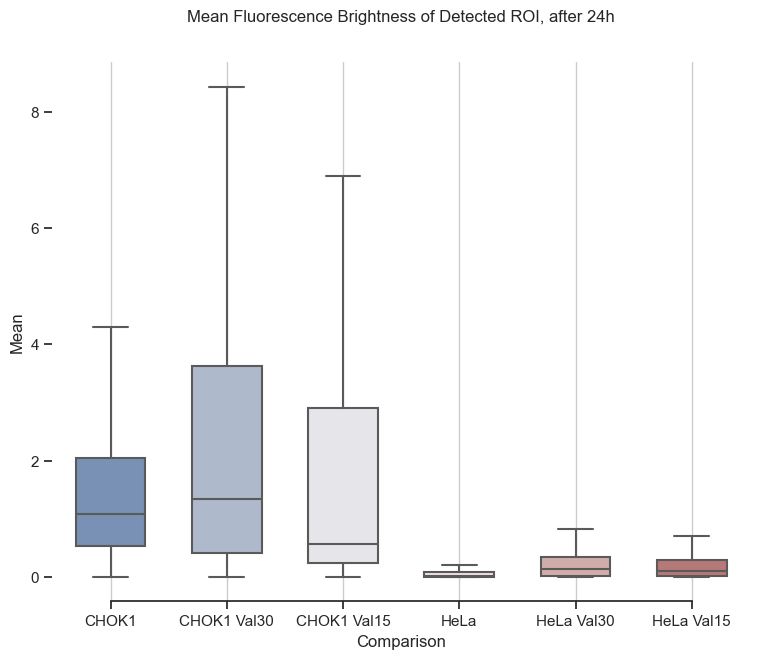

In [17]:
sns.set_theme(style="ticks")

# Initialize the figure
f, ax = plt.subplots(figsize=(9, 7))

# Plot
sns.boxplot(
    x="Set_name",
    y="Mean",
    data=all_df,
    width=0.6,
    palette="vlag",
    showfliers=False,
)


# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Mean")
ax.set(xlabel="Comparison")
sns.despine(trim=True, left=True)
plt.title("Mean Fluorescence Brightness of Detected ROI, after 24h", y=1.06)

plt.savefig("./" + "All_wells_24h" + ".png", bbox_inches="tight")
plt.show()

Text(0.5, 1.06, 'Mean Fluorescence Brightness of Detected ROI, after 4h')

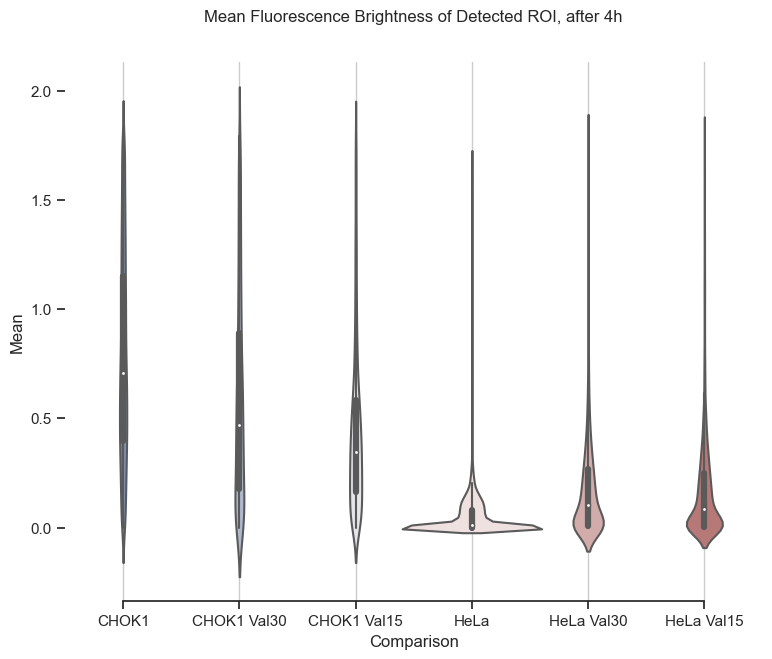

In [18]:
Q1 = all_df.Mean.quantile(0.25)
Q3 = all_df.Mean.quantile(0.75)
IQR = Q3 - Q1
cols = ["Mean"]
all_df = all_df[
    ~((all_df[cols] < (Q1 - 1.5 * IQR)) | (all_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
]

sns.set_theme(style="ticks")

# Initialize the figure
f, ax = plt.subplots(figsize=(9, 7))

# Plot
sns.violinplot(
    x="Set_name",
    y="Mean",
    data=all_df,
    width=1.2,
    palette="vlag",
    showfliers=False,
)


# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Mean")
ax.set(xlabel="Comparison")
sns.despine(trim=True, left=True)
plt.title("Mean Fluorescence Brightness of Detected ROI, after 4h", y=1.06)

In [19]:
watermark(iversions=True, globals_=globals())
print(watermark())

Last updated: 2023-02-22T18:19:27.989390+01:00

Python implementation: CPython
Python version       : 3.9.16
IPython version      : 8.9.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [20]:
print(
    watermark(
        packages="watermark,numpy,pandas,seaborn,scipy,statannotations,statsmodels"
    )
)

watermark      : 2.3.1
numpy          : 1.24.1
pandas         : 1.5.3
seaborn        : 0.11.2
scipy          : 1.10.0
statannotations: 0.5.0
statsmodels    : 0.13.5

